In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import scanpy as sc
import scipy as sp
import anndata as ad
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
in_dir = '../../results/08_mouse_ssc/04_fib_subclustering'
out_dir = '../../results/08_mouse_ssc/07_viz_fib_markers'
os.makedirs(out_dir, exist_ok=True)

In [3]:
adata = sc.read_h5ad(f'{in_dir}/adata.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 23155 × 18503
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_counts', 'n_genes', 'time_point', 'leiden', 'cell_type', 'sub_clusters'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'sub_clusters_colors', 'time_point_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

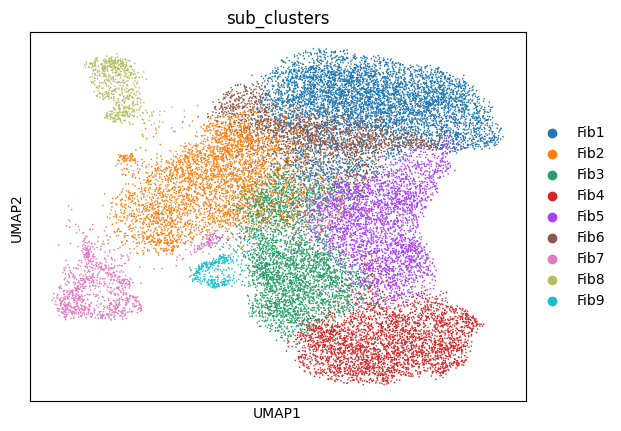

In [5]:
sc.pl.umap(adata, color="sub_clusters")

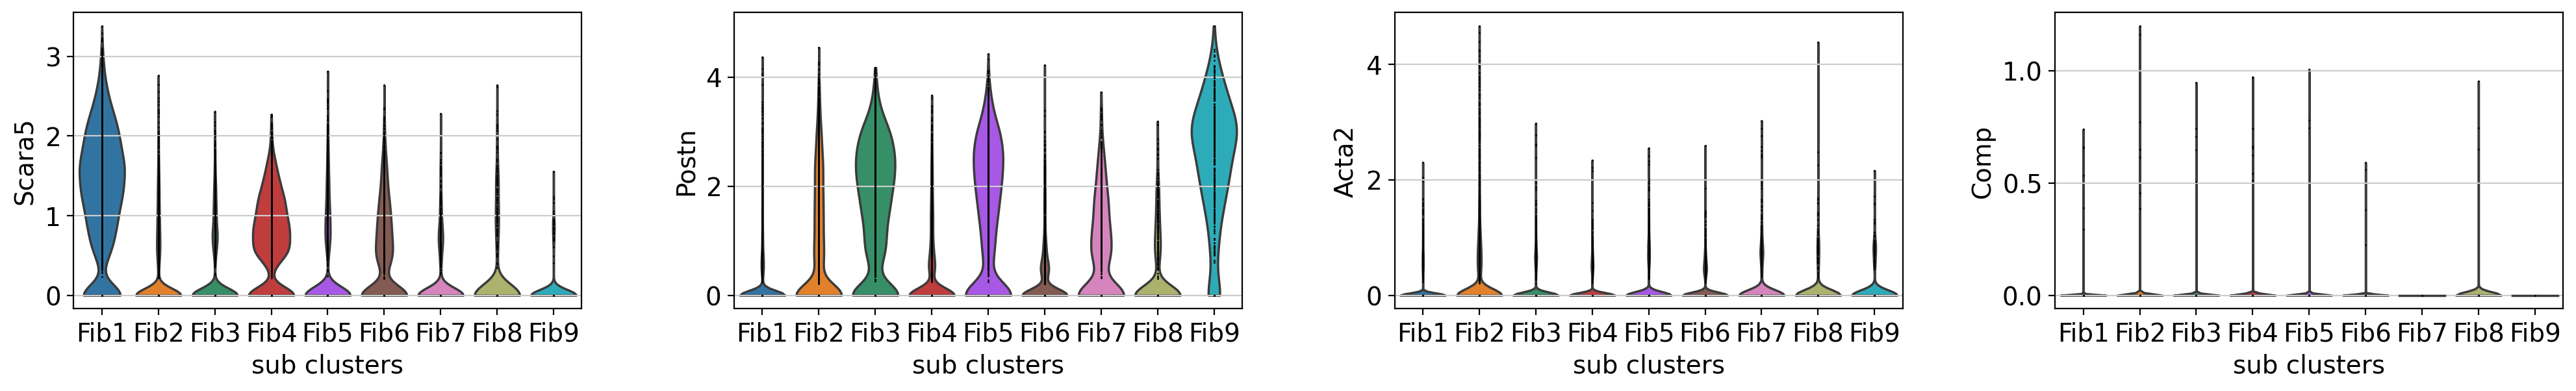

In [6]:
sc.set_figure_params(figsize=(5, 3), dpi=100, dpi_save=300, vector_friendly=True)

sc.pl.violin(adata, keys=["Scara5", "Postn", "Acta2", "Comp"], groupby="sub_clusters", use_raw=False, jitter=False)

In [7]:
markers = {"Fib1": ["Scara5", "Pcolce2", "Ackr3"],
           "Fib2": ["Anxa8", "Cox6b2", "Acta2"],
           "Fib3": ["Coch", "Ccl2", "Postn", "Comp"],
           "Fib4": ["Fmod", "Tnmd"],
           "Fib5": ["Gas1", "Fos", "Dkk2"],
           "Fib6": ["Pdpn", "Npc2", "Timp1"],
           "Fib7": ["Mdk", "Col23a1", "Vcan"],
           "Fib8": ["Mgp", "Gsn", "Cp"],
           "Fib9": ["Vcan", "Col6a1", "Aqp1"]}

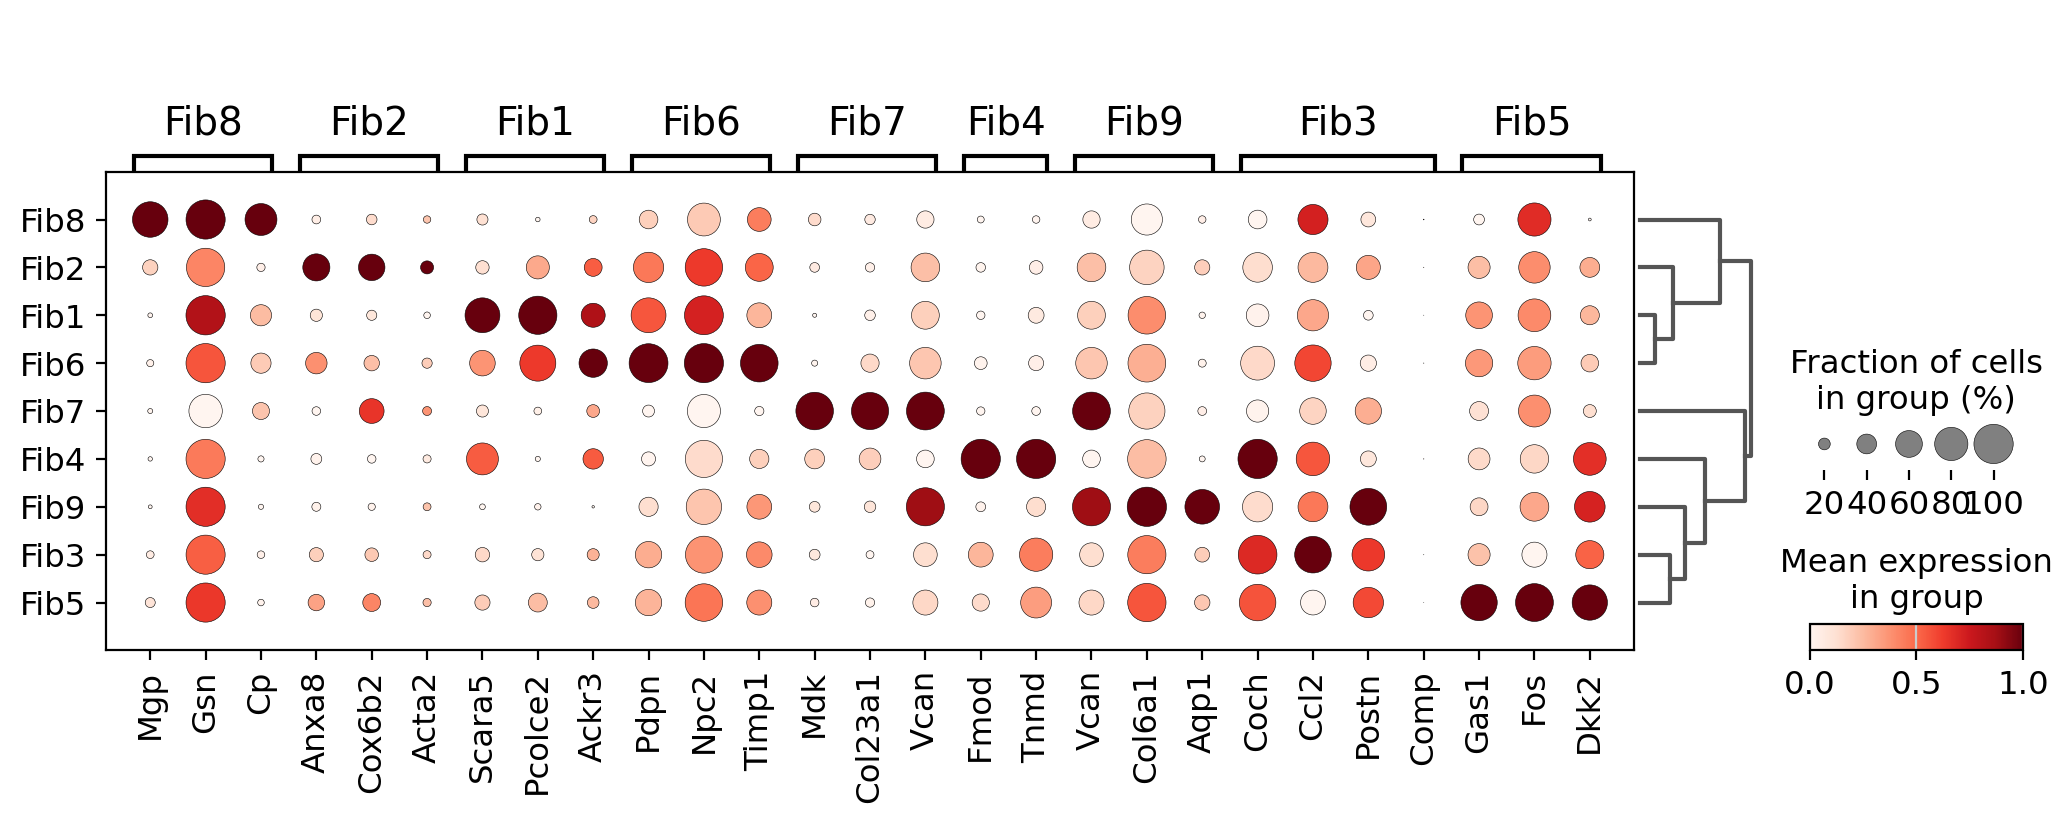

In [8]:
sc.pl.dotplot(adata, var_names=markers,
              groupby="sub_clusters", dendrogram=True, use_raw=False, standard_scale="var", save=True)

In [9]:
adata_fib1 = adata[adata.obs["sub_clusters"] == "Fib1"]

In [10]:
adata_fib1.obs

,sample,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,...,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,n_counts,n_genes,time_point,leiden,cell_type,sub_clusters
AAACCCAAGCCAAGCA-1,day0_sample1,2260,7.723562,6465.0,8.774313,27.532869,37.865429,49.744780,66.744006,118.0,...,1.825213,0.0,0.0,0.0,6465.0,2260,day0,0,Fibroblasts,Fib1
AAACCCAGTCGCAGTC-1,day0_sample1,1399,7.244228,3558.0,8.177235,39.938168,48.847667,59.078134,74.732996,84.0,...,2.360877,0.0,0.0,0.0,3558.0,1399,day0,0,Fibroblasts,Fib1
AAACGCTAGTATGTAG-1,day0_sample1,1337,7.198931,4316.0,8.370316,38.507878,50.648749,63.855422,80.607044,76.0,...,1.760890,0.0,0.0,0.0,4316.0,1337,day0,0,Fibroblasts,Fib1
AAAGAACTCTGGGCGT-1,day0_sample1,2002,7.602401,5471.0,8.607399,28.258088,39.901298,52.677755,68.707732,69.0,...,1.261195,0.0,0.0,0.0,5471.0,2002,day0,0,Fibroblasts,Fib1
AAAGGATCACCCTTAC-1,day0_sample1,2083,7.642044,6507.0,8.780787,28.461657,40.786845,53.788228,70.631627,80.0,...,1.229445,0.0,0.0,0.0,6507.0,2083,day0,0,Fibroblasts,Fib1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTACGTGTCGCATCG-1,day28_sample2,2236,7.712891,6365.0,8.758726,25.860173,38.004713,50.290652,67.588374,116.0,...,1.822467,0.0,0.0,0.0,6365.0,2236,day28,0,Fibroblasts,Fib1
TTTATGCGTCTGTCAA-1,day28_sample2,1707,7.443078,4415.0,8.392989,25.209513,38.233296,51.619479,69.875425,144.0,...,3.261608,0.0,0.0,0.0,4415.0,1707,day28,0,Fibroblasts,Fib1
TTTGATCCAAGATGGC-1,day28_sample2,2193,7.693482,6766.0,8.819813,29.663021,42.092817,54.419155,70.085723,139.0,...,2.054389,0.0,0.0,0.0,6766.0,2193,day28,0,Fibroblasts,Fib1
TTTGGAGGTATGAGCG-1,day28_sample2,2683,7.895063,8128.0,9.003193,25.172244,36.897146,49.495571,65.182087,110.0,...,1.353346,0.0,0.0,0.0,8128.0,2683,day28,0,Fibroblasts,Fib1


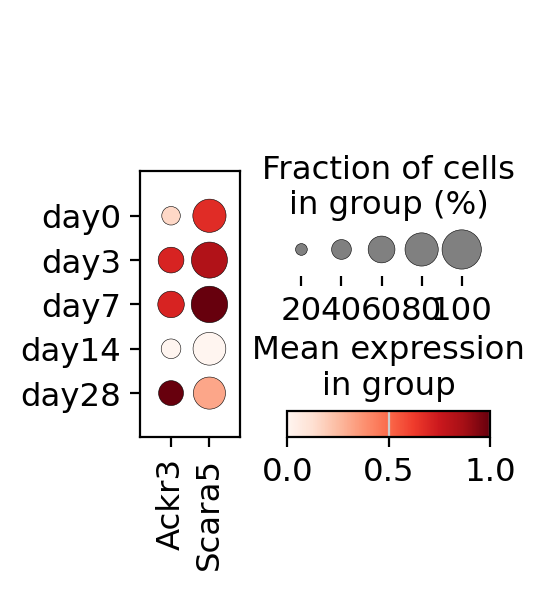

In [13]:
sc.pl.dotplot(adata_fib1, var_names=["Ackr3", "Scara5"],
              groupby="time_point", dendrogram=False, use_raw=False, standard_scale="var")